In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

Classification : binary, multi-class   
Regression   
실무에서 unsupervised learning보다 supervised learning을 더 많이 사용한다.    
Machine learning은 black-box로 동작한다.   


In [2]:
# Pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train) # chain 
X_train_scaled = scaler.transform(X_train) # 학습의 정확도를 높이기 위해서 scaling 시행

svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("test acc: {:.3f}".format(svm.score(X_test_scaled, y_test)*100))

test acc: 97.203


In [3]:
# Hyperparameter tunning을 하기 위해서 GridSearchCV를 사용한다.
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("best parameter:", grid.best_params_)
print("corss val acc: {:.2f}".format(grid.best_score_))
print("best acc: {:.2f}".format(grid.score(X_test_scaled, y_test)))

best parameter: {'C': 1, 'gamma': 1}
corss val acc: 0.98
best acc: 0.97


In [4]:
from sklearn.pipeline import Pipeline
# 첫번째 파이프에 MinMaxScaler
# 두번째 파이프에 SVC
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("test acc: {:.2f}".format(pipe.score(X_test, y_test)))

test acc: 0.97


In [5]:
param_grid = {"svm__C":[0.001, 0.01, 0.1, 1, 10, 100],
             "svm__gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [6]:
print("best score: {:.2f}".format(grid.best_score_))
print("test acc: {:.2f}".format(grid.score(X_test, y_test)))
print("best parameter:", grid.best_params_)

best score: 0.98
test acc: 0.97
best parameter: {'svm__C': 1, 'svm__gamma': 1}


In [7]:
# make_pipeline
from sklearn.pipeline import make_pipeline
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))]) # Class를 사용하여 pipeline 생성
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100)) # function을 사용하여 pipeline 생성

print("Pipeline phase:\n", pipe_short.steps)

Pipeline phase:
 [('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Unsupervised learning

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Pipeline phase:\n", pipe.steps)

Pipeline phase:
 [('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [9]:
pipe.fit(cancer.data)

Pipeline(steps=[('standardscaler-1', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('standardscaler-2', StandardScaler())])

In [10]:
components = pipe.named_steps["pca"].components_
components.shape
# 주성분 2, features 30

(2, 30)

In [11]:
components

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [12]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C":[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [13]:
print("best model:\n", grid.best_estimator_)

best model:
 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])


In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree': [1,2,3],
             'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

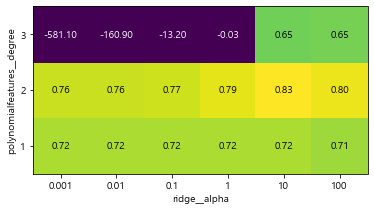

In [15]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                     xlabel="ridge__alpha", ylabel='polynomialfeatures__degree',
                     xticklabels=param_grid['ridge__alpha'],
                     yticklabels=param_grid['polynomialfeatures__degree'], vmin=0) # reshape(row, col), -1 : optimized col counts auto search
plt.show()


In [16]:
print("최적의 매개 변수:", grid.best_params_)

최적의 매개 변수: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [17]:
print("test acc: {:.2f}".format(grid.score(X_test, y_test)))

test acc: 0.77


In [18]:
# 모델 선택을 위한 그리드 서치
# 지금까지 배운 것은 모델은 정해져 있고, 모델에 들어가는 parameter만 tunning했지만
# 이제는 모델을 선택해보자.

pipe = Pipeline([("preprocessing", StandardScaler()), ("classifier", SVC())])

from sklearn.ensemble import RandomForestClassifier
# SVC가 좋은지? RandomForest가 좋은지? 판단
param_grid = [{'classifier':[SVC()], 'preprocessing':[StandardScaler()],
              'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100]},
              {'classifier':[RandomForestClassifier(n_estimators=100)],
              'preprocessing':[None], 'classifier__max_features':[1,2,3]}]

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=10, gamma=0.01)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler()]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [19]:
print("최적의 매개 변수:\n", grid.best_params_)

최적의 매개 변수:
 {'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}


In [20]:
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.99


In [21]:
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.98


In [22]:
# text data

In [23]:
from sklearn.datasets import load_files
reviews_train = load_files("data/train/")

In [24]:
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))

text_train의 타입: <class 'list'>
text_train의 길이: 25000


In [25]:
print("text_train[6]:\n", text_train[6])

text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [26]:
text_train = [ doc.replace(b"<br />", b"") for doc in text_train ] # list comprehension
text_train[6]

b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [27]:
import numpy as np
print("분류별 개수:", np.bincount(y_train))
print(reviews_train.target_names)

분류별 개수: [12500 12500]
['neg', 'pos']


In [28]:
reviews_test = load_files("data/test")

In [29]:
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 수:", len(text_test))
print("클래스 별 수:", np.bincount(y_test))

테스트 데이터의 수: 25000
클래스 별 수: [12500 12500]


In [30]:
text_test = [ doc.replace(b"<br />", b"") for doc in text_test ]

In [31]:
# BOW
bards_words = ["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [32]:
print("어휘 사전의 크기:", len(vect.vocabulary_))

어휘 사전의 크기: 13


In [33]:
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [34]:
sorted(vect.vocabulary_.items())
# 알파벳 순으로 오름차순 정렬

[('be', 0),
 ('but', 1),
 ('doth', 2),
 ('fool', 3),
 ('he', 4),
 ('himself', 5),
 ('is', 6),
 ('knows', 7),
 ('man', 8),
 ('the', 9),
 ('think', 10),
 ('to', 11),
 ('wise', 12)]

In [35]:
bag_of_words = vect.transform(bards_words)
bag_of_words

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [36]:
bag_of_words.toarray()
# 각 행의 0과 1은 대입되는 문장에 해당하는 단어가 있는지를 나타낸다. 1은 해당 단어가 문장안에 존재.

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [37]:
%%time
vect = CountVectorizer().fit(text_train)

Wall time: 3.39 s


In [38]:
%%time
X_train = vect.transform(text_train)

Wall time: 3.21 s


In [39]:
X_train

<25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>

In [40]:
feature_names = vect.get_feature_names()
print("특성의 수:", len(feature_names))

특성의 수: 75911


In [41]:
print("처음 20개 특성:\n", feature_names[:20])

처음 20개 특성:
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']


In [42]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("cross validation avg score: {:.2f}".format(np.mean(scores)))

cross validation avg score: 0.88
Wall time: 9.87 s


In [43]:
%%time
# L1 규제는 마름모 안에 데이터를 넣도록 규제
# L2 규제는 동그라미 안에 데이터를 넣도록 규제
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 벨리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개 변수:", grid.best_params_)

최상의 크로스 벨리데이션 점수: 0.89
최적의 매개 변수: {'C': 0.1}
Wall time: 52.1 s


In [44]:
X_test = vect.transform(text_test)
print("test acc: {:.2f}".format(grid.score(X_test, y_test)))

test acc: 0.88


In [50]:
vect = CountVectorizer(min_df=5).fit(text_train) # min_df : 각 리뷰에 단어의 빈도수가 5번 이상인 단어만 선택하겠다. (noise remove)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27264 sparse matrix of type '<class 'numpy.int64'>'
	with 3352876 stored elements in Compressed Sparse Row format>


In [46]:
%%time
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("optimal cross-validation score : {:.2f}".format(grid.best_score_))

optimal cross-validation score : 0.89
Wall time: 30.2 s


In [47]:
# Stopword (Ex. a, this, the...)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Stopword counts:", len(ENGLISH_STOP_WORDS))

Stopword counts: 318


In [51]:
print(sorted(ENGLISH_STOP_WORDS))

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give

In [52]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("Stopword가 제거된 X_train:\n", repr(X_train))

Stopword가 제거된 X_train:
 <25000x26959 sparse matrix of type '<class 'numpy.int64'>'
	with 2149073 stored elements in Compressed Sparse Row format>


In [49]:
%%time
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("best cross-validation score: {:.2f}".format(grid.best_score_))

best cross-validation score: 0.88
Wall time: 19.5 s


In [54]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), LogisticRegression())
param_grid = {"countvectorizer__max_df":[100, 1000, 10000, 20000], 
             "logisticregression__C":[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)

In [55]:
%%time
grid.fit(text_train, y_train)

Wall time: 7min 56s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'countvectorizer__max_df': [100, 1000, 10000, 20000],
                         'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]})

In [56]:
print("최상의 크로스 벨리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 벨리데이션 점수: 0.89


In [57]:
print("best parameter:", grid.best_params_)

best parameter: {'countvectorizer__max_df': 20000, 'logisticregression__C': 0.1}


In [58]:
len(grid.best_estimator_.named_steps['countvectorizer'].vocabulary_)

75902

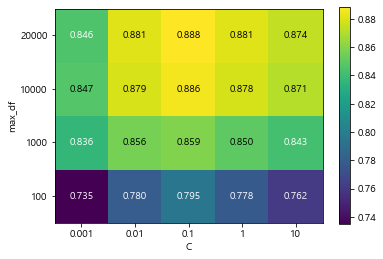

In [59]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5)
heatmap = mglearn.tools.heatmap(
scores, xlabel="C", ylabel="max_df", cmap='viridis', fmt="%.3f", xticklabels=param_grid['logisticregression__C'],
yticklabels=param_grid['countvectorizer__max_df'])
plt.colorbar(heatmap)
plt.show()

TF-IDF(Term Frequency - Inverse Document Frequency)는 정보 검색과 텍스트 마이닝에서 이용하는 가중치로, 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치이다. 문서의 핵심어를 추출하거나, 검색 엔진에서 검색 결과의 순위를 결정하거나, 문서들 사이의 비슷한 정도를 구하는 등의 용도로 사용할 수 있다.   

TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것을 DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다. TF-IDF는 TF와 IDF를 곱한 값이다.   

IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.   

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)

In [62]:
%%time
grid.fit(text_train, y_train)

Wall time: 1min 46s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]})

In [63]:
print("best cross val score: {:.2f}".format(grid.best_score_))

best cross val score: 0.89


In [64]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf][:20])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'galadriel' 'songwriting'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']


In [65]:
print("가장 높은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf][-20:])

가장 높은 tfidf를 가진 특성:
 ['gadget' 'zatoichi' 'demons' 'lennon' 'bye' 'sucks' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [66]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 갖는 특성:\n", feature_names[sorted_by_idf][:100])
# 결과 값이 stopword랑 거의 비슷하다.
# idf가 낮다는 의미는 자주 나오는 언어라는 것을 의미한다.

가장 낮은 idf를 갖는 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


In [67]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.43291553, -0.52361751, -0.11578115, ...,  0.29673077,
        -0.09336753, -0.37311562]])

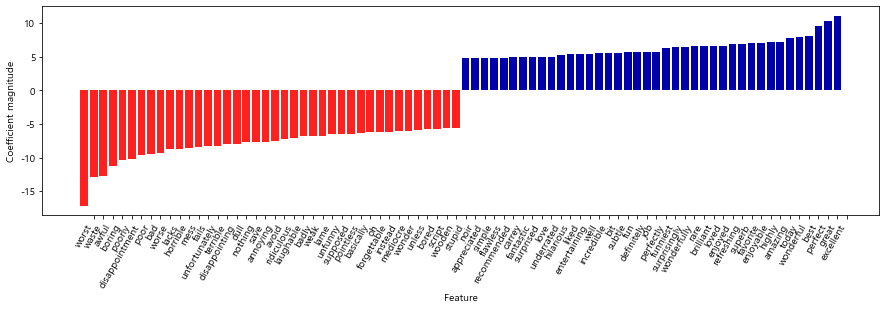

In [69]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0],
                                    feature_names, n_top_features=40)

In [71]:
# tensorflow & keras : deep learning
import tensorflow as tf
tf.__version__

'1.14.0'

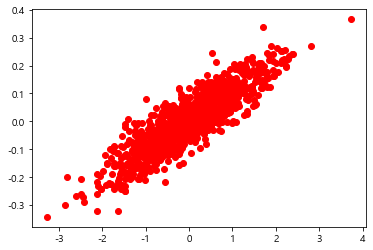

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
my_data = []
for i in range(1000):
    x = np.random.normal(0, 1) # Z 분포 생성, avg 0, std 1
    y = 0.1* x + np.random.normal(0, 0.05) # y = 0.1x + noise
    my_data.append([x,y])
x_data = [v[0] for v in my_data]
y_data = [v[1] for v in my_data]
plt.plot(x_data, y_data, 'ro')
plt.show()

step= 0 W= [0.41160965] Cost= 0.091902025


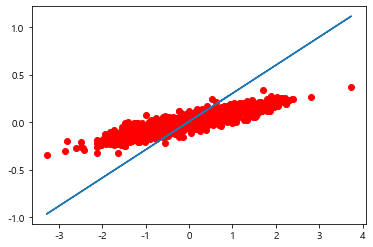

step= 1 W= [0.2968756] Cost= 0.03810319


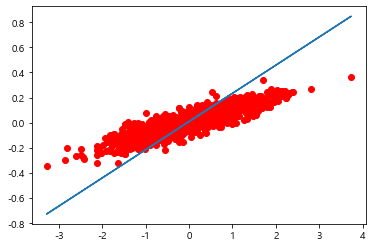

step= 2 W= [0.22457469] Cost= 0.016781574


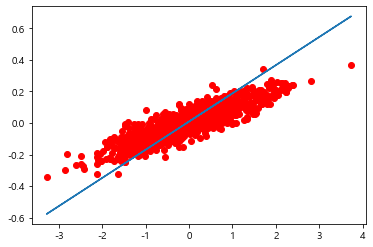

step= 3 W= [0.1789757] Cost= 0.008302433


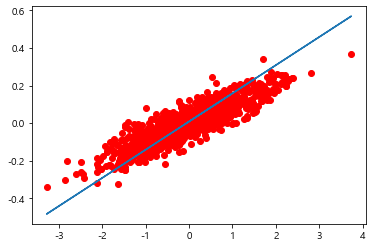

step= 4 W= [0.1501945] Cost= 0.0049200067


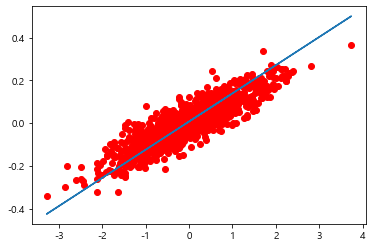

step= 5 W= [0.1320147] Cost= 0.0035669506


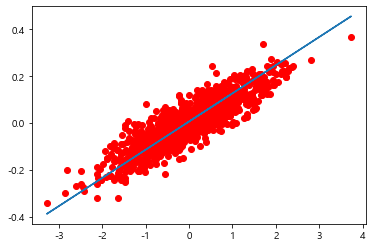

step= 6 W= [0.12052321] Cost= 0.0030243439


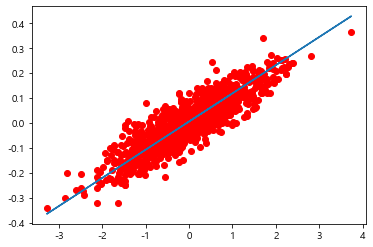

step= 7 W= [0.1132545] Cost= 0.0028062628


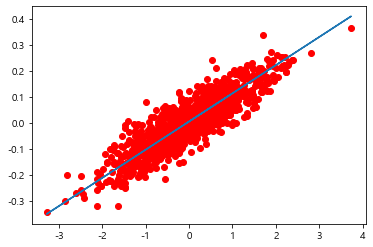

step= 8 W= [0.1086539] Cost= 0.002718439


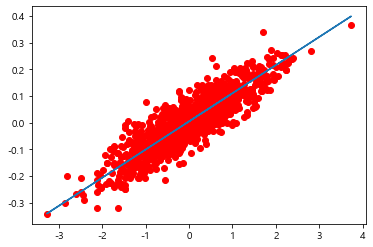

step= 9 W= [0.10574029] Cost= 0.0026830102


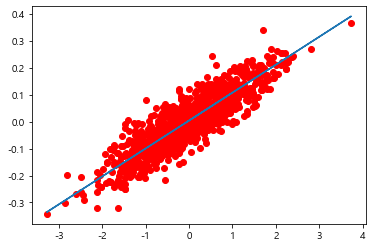

In [76]:
W = tf.Variable(tf.random_uniform([1], -1, 1)) # -1 ~ 1 사이에 1차원 균등분포
b = tf.Variable(tf.zeros([1])) # b = 0
hypothesis = W * x_data + b
cost = tf.reduce_mean(tf.square(hypothesis - y_data)) # 평균(제곱(예측값-정답)) : Mean Square Error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2) # learning_rage : 보폭
train = optimizer.minimize(cost) # cost를 최소화한다.
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # global_vatiables_initializer가 tf.Variable을 초기화한다.
for step in range(10):
    print("step=", step, "W=", sess.run(W), "Cost=", sess.run(cost))
    sess.run(train)
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.show()
sess.close()

In [77]:
# keras code

x = np.linspace(1, 10, 1000)
y = 2 * x + 1 # y = wx + b

from keras.models import Sequential
from keras.layers import Dense 

model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))
model.compile(loss='mse', optimizer='sgd')
model.fit(x,y, epochs=20)


Epoch 1/20
1000/1000 [==============================] - 0s 154us/step - loss: 13.4948
Epoch 2/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0410
Epoch 3/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0327
Epoch 4/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.0259
Epoch 5/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0208
Epoch 6/20
1000/1000 [==============================] - 0s 14us/step - loss: 0.0164
Epoch 7/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0132
Epoch 8/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0104
Epoch 9/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0083
Epoch 10/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.0066
Epoch 11/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0053
Epoch 12/20
1000/1000 [==============================] - 0s 15us/step -

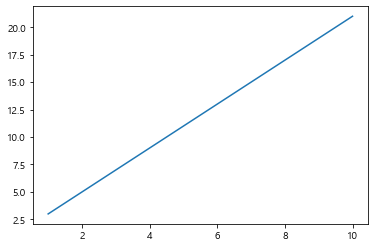

In [78]:
plt.plot(x,y)
plt.show()

In [82]:
pred_x = [12, 14]
pred_x

[12, 14]

In [83]:
pred_y = model.predict(pred_x)
pred_y

array([[25.043034],
       [29.059566]], dtype=float32)

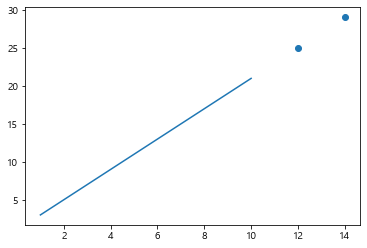

In [84]:
plt.plot(x,y)
plt.scatter(pred_x, pred_y)
plt.show()

In [85]:
model.get_weights()
# 첫번째 값(기울기), 두번째 값(절편)

[array([[2.0082667]], dtype=float32), array([0.9438318], dtype=float32)]